<a href="https://colab.research.google.com/github/morearchish/30days_off_lutter/blob/master/Copy_of_ODM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow-gpu==2.8

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 497.5 MB 24 kB/s 
     |████████████████████████████████| 462 kB 35.1 MB/s 


In [2]:
!unzip training_demo.zip

Archive:  training_demo.zip
   creating: training_demo/annotations/
  inflating: training_demo/annotations/label_map.pbtxt  
  inflating: training_demo/export_tflite_graph_tf2.py  
   creating: training_demo/exported-models/
  inflating: training_demo/exporter_main_v2.py  
  inflating: training_demo/gererate_tfrecord.py  
   creating: training_demo/images/
   creating: training_demo/images/test/
  inflating: training_demo/images/test/2021_02_14_18_40_03_9507.jpg  
  inflating: training_demo/images/test/2021_02_14_18_40_03_9507.xml  
  inflating: training_demo/images/test/2021_02_15_10_06_42_5086.jpg  
  inflating: training_demo/images/test/2021_02_15_10_06_42_5086.xml  
  inflating: training_demo/images/test/2021_02_15_10_07_43_5109.jpg  
  inflating: training_demo/images/test/2021_02_15_10_07_43_5109.xml  
  inflating: training_demo/images/test/2021_02_15_10_47_49_6096.jpg  
  inflating: training_demo/images/test/2021_02_15_10_47_49_6096.xml  
  inflating: training_demo/images/test/20

In [3]:
import tensorflow as tf

In [4]:
print(tf.__version__)

2.8.0


Cloning the TFOD 2.0 GITHUB

In [5]:
!git clone https://github.com/tensorflow/models.git

Cloning into 'models'...
remote: Enumerating objects: 75161, done.
remote: Total 75161 (delta 0), reused 0 (delta 0), pack-reused 75161
Receiving objects: 100% (75161/75161), 580.40 MiB | 36.52 MiB/s, done.
Resolving deltas: 100% (53367/53367), done.


In [6]:
pwd

'/content'

In [7]:
cd /content/models/research

/content/models/research


In [8]:
pwd

'/content/models/research'

In [9]:
!protoc object_detection/protos/*.proto --python_out=.

In [10]:
!git clone https://github.com/cocodataset/cocoapi.git


Cloning into 'cocoapi'...
remote: Enumerating objects: 975, done.
remote: Total 975 (delta 0), reused 0 (delta 0), pack-reused 975
Receiving objects: 100% (975/975), 11.72 MiB | 34.60 MiB/s, done.
Resolving deltas: 100% (576/576), done.


In [11]:
cd cocoapi/PythonAPI

/content/models/research/cocoapi/PythonAPI


In [12]:
!make

python setup.py build_ext --inplace
running build_ext
cythoning pycocotools/_mask.pyx to pycocotools/_mask.c
/usr/local/lib/python3.7/dist-packages/Cython/Compiler/Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /content/models/research/cocoapi/PythonAPI/pycocotools/_mask.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
building 'pycocotools._mask' extension
creating build
creating build/common
creating build/temp.linux-x86_64-3.7
creating build/temp.linux-x86_64-3.7/pycocotools
x86_64-linux-gnu-gcc -pthread -Wno-unused-result -Wsign-compare -DNDEBUG -g -fwrapv -O2 -Wall -g -fstack-protector-strong -Wformat -Werror=format-security -g -fwrapv -O2 -g -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2 -fPIC -I/usr/local/lib/python3.7/dist-packages/numpy/core/include -I../common -I/usr/include/python3.7m -c ../common/maskApi.c -o build/temp.linux-x86_64-3.7

In [13]:
cp -r pycocotools /content/models/research


**Install the Object Detection API**

In [14]:
pwd

'/content/models/research/cocoapi/PythonAPI'

In [15]:
cd ..

/content/models/research/cocoapi


In [16]:
cd /content/models/research

/content/models/research


In [17]:
cp object_detection/packages/tf2/setup.py .

In [18]:
!python -m pip install --use-feature=2020-resolver .

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Processing /content/models/research
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
     |████████████████████████████████| 10.9 MB 52.7 MB/s 
     |████████████████████████████████| 352 kB 68.6 MB/s 
     |████████████████████████████████| 2.1 MB 61.6 MB/s 
     |████████████████████████████████| 25.9 MB 1.2 MB/s 
     |████████████████████████████████| 67 kB 7.2 MB/s 
     |████████████████████████████████| 92 kB 13.7 MB/s 
     |████████████████████████████████| 99 kB 11.3 MB/s 
     |████████████████████████████████| 511.7 MB 6.1 kB/s 
     |█

In [19]:
pwd

'/content/models/research'

In [20]:
# From within TensorFlow/models/research/
!python object_detection/builders/model_builder_tf2_test.py

Running tests under Python 3.7.13: /usr/bin/python3
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_deepmac
2022-07-11 05:27:32.049290: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:42] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
W0711 05:27:32.282728 140620591204224 model_builder.py:1102] Building experimental DeepMAC meta-arch. Some features may be omitted.
INFO:tensorflow:time(__main__.ModelBuilderTF2Test.test_create_center_net_deepmac): 1.5s
I0711 05:27:32.654133 140620591204224 test_util.py:2459] time(__main__.ModelBuilderTF2Test.test_create_center_net_deepmac): 1.5s
[       OK ] ModelBuilderTF2Test.test_create_center_net_deepmac
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_model0 (customize_head_params=True)
INFO:tensorflow:time(__main__.ModelBuilderTF2Test.test_create_center_net_model0 (customize_head_params=True)): 0.51s
I0711 05:27:33.160272 140620591204224 test_uti

In [21]:
cd /content/training_demo/pre-trained-models


/content/training_demo/pre-trained-models


In [22]:
!wget http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_resnet50_v1_fpn_640x640_coco17_tpu-8.tar.gz

--2022-07-11 05:27:59--  http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_resnet50_v1_fpn_640x640_coco17_tpu-8.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 172.253.63.128, 2607:f8b0:4004:c08::80
Connecting to download.tensorflow.org (download.tensorflow.org)|172.253.63.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 244817203 (233M) [application/x-tar]
Saving to: ‘ssd_resnet50_v1_fpn_640x640_coco17_tpu-8.tar.gz’

ssd_resnet50_v1_fpn 100%[===================>] 233.48M   352MB/s    in 0.7s    

2022-07-11 05:28:00 (352 MB/s) - ‘ssd_resnet50_v1_fpn_640x640_coco17_tpu-8.tar.gz’ saved [244817203/244817203]



In [23]:
!tar -xvf ssd_resnet50_v1_fpn_640x640_coco17_tpu-8.tar.gz

ssd_resnet50_v1_fpn_640x640_coco17_tpu-8/
ssd_resnet50_v1_fpn_640x640_coco17_tpu-8/checkpoint/
ssd_resnet50_v1_fpn_640x640_coco17_tpu-8/checkpoint/ckpt-0.data-00000-of-00001
ssd_resnet50_v1_fpn_640x640_coco17_tpu-8/checkpoint/checkpoint
ssd_resnet50_v1_fpn_640x640_coco17_tpu-8/checkpoint/ckpt-0.index
ssd_resnet50_v1_fpn_640x640_coco17_tpu-8/pipeline.config
ssd_resnet50_v1_fpn_640x640_coco17_tpu-8/saved_model/
ssd_resnet50_v1_fpn_640x640_coco17_tpu-8/saved_model/saved_model.pb
ssd_resnet50_v1_fpn_640x640_coco17_tpu-8/saved_model/assets/
ssd_resnet50_v1_fpn_640x640_coco17_tpu-8/saved_model/variables/
ssd_resnet50_v1_fpn_640x640_coco17_tpu-8/saved_model/variables/variables.data-00000-of-00001
ssd_resnet50_v1_fpn_640x640_coco17_tpu-8/saved_model/variables/variables.index


In [24]:
cd /content/training_demo

/content/training_demo


In [32]:
# Create train data:
!python generate_tfrecord.py -x /content/training_demo/images/train -l /content/training_demo/annotations/label_map.pbtxt -o /content/training_demo/annotations/train.record

# Create test data:
!python generate_tfrecord.py -x /content/training_demo/images/test -l /content/training_demo/annotations/label_map.pbtxt -o /content/training_demo/annotations/test.record

# For example
# python generate_tfrecord.py -x C:/Users/sglvladi/Documents/Tensorflow/workspace/training_demo/images/train -l C:/Users/sglvladi/Documents/Tensorflow/workspace/training_demo/annotations/label_map.pbtxt -o C:/Users/sglvladi/Documents/Tensorflow/workspace/training_demo/annotations/train.record
# python generate_tfrecord.py -x C:/Users/sglvladi/Documents/Tensorflow/workspace/training_demo/images/test -l C:/Users/sglvladi/Documents/Tensorflow2/workspace/training_demo/annotations/label_map.pbtxt -o C:/Users/sglvladi/Documents/Tensorflow/workspace/training_demo/annotations/test.record

Successfully created the TFRecord file: /content/training_demo/annotations/train.record
Successfully created the TFRecord file: /content/training_demo/annotations/test.record


In [33]:
cd /content/training_demo

/content/training_demo


In [34]:
ls

annotations/         export_tflite_graph_tf2.py  model_main_tf2.py
exported-models/     generate_tfrecord.py        models/
exporter_main_v2.py  images/                     pre-trained-models/


In [35]:
!pip install "opencv-python-headless<4.3"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [36]:
!apt install --allow-change-held-packages libcudnn8=8.1.0.77-1+cuda11.2

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libcudnn8 is already the newest version (8.1.0.77-1+cuda11.2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 60 not upgraded.


In [38]:
!python model_main_tf2.py --model_dir=/content/training_demo/models/my_ssd_resnet101_v1_fpn --pipeline_config_path=/content/training_demo/models/my_ssd_resnet101_v1_fpn/pipeline.config


2022-07-11 05:36:59.533703: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:42] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
I0711 05:36:59.580374 140253014783872 mirrored_strategy.py:374] Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
INFO:tensorflow:Maybe overwriting train_steps: None
I0711 05:36:59.584251 140253014783872 config_util.py:552] Maybe overwriting train_steps: None
INFO:tensorflow:Maybe overwriting use_bfloat16: False
I0711 05:36:59.584406 140253014783872 config_util.py:552] Maybe overwriting use_bfloat16: False
Instructions for updating:
rename to distribute_datasets_from_function
W0711 05:36:59.740455 140253014783872 deprecation.py:356] From /usr/local/lib/python3.7/dist-packages/object_detection/model_lib_v2.py:564: StrategyBase.experimental

In [39]:
pwd

'/content/training_demo'

In [40]:
!python exporter_main_v2.py --input_type image_tensor --pipeline_config_path /content/training_demo/models/my_ssd_resnet101_v1_fpn/pipeline.config --trained_checkpoint_dir /content/training_demo/models/my_ssd_resnet101_v1_fpn --output_directory /content/training_demo/exported_models/my_model

2022-07-11 06:25:21.955509: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:42] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
Instructions for updating:
back_prop=False is deprecated. Consider using tf.stop_gradient instead.
Instead of:
results = tf.map_fn(fn, elems, back_prop=False)
Use:
results = tf.nest.map_structure(tf.stop_gradient, tf.map_fn(fn, elems))
W0711 06:25:22.104035 139702812030848 deprecation.py:628] From /usr/local/lib/python3.7/dist-packages/tensorflow/python/autograph/impl/api.py:458: calling map_fn_v2 (from tensorflow.python.ops.map_fn) with back_prop=False is deprecated and will be removed in a future version.
Instructions for updating:
back_prop=False is deprecated. Consider using tf.stop_gradient instead.
Instead of:
results = tf.map_fn(fn, elems, back_prop=False)
Use:
results = tf.nest.map_structure(tf.stop_gradient, tf.map_fn(fn, elems))
W0711 06:25:40.811563 1397028120308

Loading model...Done! Took 13.295854568481445 seconds
Running inference for /content/check_image3.jpg... Done


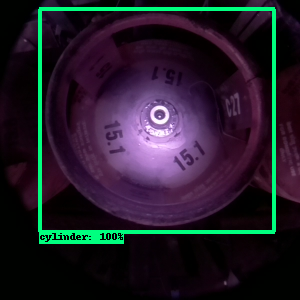

In [54]:

# Object Detection (On Image) From TF2 Saved Model

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'    # Suppress TensorFlow logging (1)
import pathlib
import tensorflow as tf
import cv2
import argparse
from google.colab.patches import cv2_imshow


gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

IMAGE_PATHS = '/content/check_image3.jpg' # check_image 1,2,3 you can check any of them (i haven't taken these images in train or test dataset)

PATH_TO_MODEL_DIR = '/content/training_demo/exported_models/my_model'  # it is created ater training is complete

PATH_TO_LABELS = '/content/training_demo/annotations/label_map.pbtxt'  

MIN_CONF_THRESH = float(0.60)

import time
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils

PATH_TO_SAVED_MODEL = PATH_TO_MODEL_DIR + "/saved_model"

print('Loading model...', end='')
start_time = time.time()

detect_fn = tf.saved_model.load(PATH_TO_SAVED_MODEL)

end_time = time.time()
elapsed_time = end_time - start_time
print('Done! Took {} seconds'.format(elapsed_time))

# LOAD LABEL MAP DATA FOR PLOTTING

category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS,
                                                                    use_display_name=True)

import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')   # Suppress Matplotlib warnings

def load_image_into_numpy_array(path):
    """Load an image from file into a numpy array.
    Puts image into numpy array to feed into tensorflow graph.
    Note that by convention we put it into a numpy array with shape
    (height, width, channels), where channels=3 for RGB.
    Args:
      path: the file path to the image
    Returns:
      uint8 numpy array with shape (img_height, img_width, 3)
    """
    return np.array(Image.open(path))




print('Running inference for {}... '.format(IMAGE_PATHS), end='')

image = cv2.imread(IMAGE_PATHS)
image_rgb = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
image_expanded = np.expand_dims(image_rgb, axis=0)

input_tensor = tf.convert_to_tensor(image)

input_tensor = input_tensor[tf.newaxis, ...]

detections = detect_fn(input_tensor)

num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
               for key, value in detections.items()}
detections['num_detections'] = num_detections

detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

image_with_detections = image.copy()

viz_utils.visualize_boxes_and_labels_on_image_array(
      image_with_detections,
      detections['detection_boxes'],
      detections['detection_classes'],
      detections['detection_scores'],
      category_index,
      use_normalized_coordinates=True,
      max_boxes_to_draw=200,
      min_score_thresh=0.5,
      agnostic_mode=False)

print('Done')

cv2_imshow(image_with_detections)
